# Monitoring of CO2 emissions from passenger cars, 2023 - Final
[2023 Dataset](https://www.eea.europa.eu/en/datahub/datahubitem-view/fa8b1229-3db6-495d-b18e-9c9b3267c02b?activeAccordion=)

|Name|Definition|Datatype|Cardinality|Relevance Comment|
|---|---|---|---|---|
|ID|Identification number.|integer|1..1|mapping/identification only|
|MS|Member state.|varchar(2)|0..1|only indirect influence?|
|Mp|Manufacturer pooling.|varchar(50)|0..1|mapping/identification only|
|VFN|Vehicle family identification number.|varchar(25)|0..1|mapping/identification only|
|Mh|Manufacturer name EU standard denomination .|varchar(50)|0..1|mapping/identification only|
|Man|Manufacturer name OEM declaration.|varchar(50)|0..1|mapping/identification only|
|MMS|Manufacturer name MS registry denomination .|varchar(125)|0..1|mapping/identification only|
|TAN|Type approval number.|varchar(50)|0..1|mapping/identification only|
|T|Type.|varchar(25)|0..1|mapping/identification only|
|Va|Variant.|varchar(25)|0..1|mapping/identification only|
|Ve|Version.|varchar(35)|0..1|mapping/identification only|
|Mk|Make.|varchar(25)|0..1|mapping/identification only|
|Cn|Commercial name.|varchar(50)|0..1|mapping/identification only|
|Ct|Category of the vehicle type approved.|varchar(5) |0..1|maybe correlated to fuel type or engine type?|
|Cr|Category of the vehicle registered.|varchar(5) |0..1|maybe correlated to fuel type or engine type?|
|M (kg)|Mass in running order Completed/complete vehicle .|integer|0..1|relevant?|
|Mt|WLTP test mass.|integer|0..1|relevant?|
|Enedc (g/km)|Specific CO2 Emissions (NEDC).|integer|0..1|older standard?|
|Ewltp (g/km)|Specific CO2 Emissions (WLTP).|integer|0..1|our target variable?|
|W (mm)|Wheel Base.|integer|0..1|potentially relevant (influence on size and weight?)|
|At1 (mm)|Axle width steering axle.|integer|0..1|potentially relevant (influence on size and weight?)|
|At2 (mm)|Axle width other axle.|integer|0..1|potentially relevant (influence on size and weight?)|
|Ft|Fuel type.|varchar(25)|0..1|highly relevant?|
|Fm|Fuel mode.|varchar(1) |0..1|relevant? (e.g. if hybrid)|
|Ec (cm3)|Engine capacity.|integer|0..1|relevant?|
|Ep (KW)|Engine power.|integer|0..1|relevant?|
|Z (Wh/km)|Electric energy consumption.|integer|0..1|tbd|
|IT|Innovative technology or group of innovative technologies.|varchar(25)|0..1|potentially relevant (influence of car characteristics, but maybe too superficial/complex)|
|Ernedc (g/km)|Emissions reduction through innovative technologies.|float|0..1|probably depending on IT value but with focus emissions -> relevant?|
|Erwltp (g/km)|Emissions reduction through innovative technologies (WLTP).|float|0..1|probably depending on IT value but with focus emissions -> relevant?|
|De|Deviation factor.|float|0..1|tbd|
|Vf|Verification factor.|integer|0..1|tbd|
|R|Total new registrations.|integer|0..1|tbd|
|Year|Reporting year.|integer|0..1|relevant?|
|Status|P = Provisional data, F = Final data.|varchar(1) |0..1|tbd|
|Version_file|Internal versioning of deliverables.|varchar(10)|0..1|tbd|
|E (g/km)|Specific CO2 Emission. Deprecated value, only relevant for data until 2016.|float|0..1|tbd|
|Er (g/km)|Emissions reduction through innovative technologies. Deprecated value, only relevant for data until 2016.|float|0..1|tbd|
|Zr|Electric range.|integer|0..1|tbd|
|Dr|Registration date.|date|0..1|tbd|
|Fc|Fuel consumption.|float|0..1|tbd|

## Basic Analysis of data

* Distribution
* Missing values
* Correlations
* ... TODO

In [3]:
# 1. imports libraries - a general  for the following process

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
%matplotlib inline

In [ ]:
# 2. imports and displays the information of the initial dataframe

df = pd.read_csv("filepath/CO2_passenger_cars_2023.csv", sep = ",")

print("The dataset dimensions are:", df.shape)

print("The dataset variables are:", df.columns)

df.head(10)

C:\Users\leone\AppData\Local\Temp\ipykernel_9872\3152586293.py:3: DtypeWarning: Columns (3,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/leone/Project/CO2_passenger_cars_2023.csv", sep = ",")


The dataset dimensions are: (10734898, 40)
The dataset variables are: Index(['ID', 'Country', 'VFN', 'Mp', 'Mh', 'Man', 'MMS', 'Tan', 'T', 'Va',
       'Ve', 'Mk', 'Cn', 'Ct', 'Cr', 'r', 'm (kg)', 'Mt', 'Enedc (g/km)',
       'Ewltp (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)', 'Ft', 'Fm',
       'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'IT', 'Ernedc (g/km)',
       'Erwltp (g/km)', 'De', 'Vf', 'Status', 'year', 'Date of registration',
       'Fuel consumption ', 'ech', 'RLFI', 'Electric range (km)'],
      dtype='object')


,ID,Country,VFN,Mp,Mh,Man,MMS,Tan,T,Va,...,Erwltp (g/km),De,Vf,Status,year,Date of registration,Fuel consumption,ech,RLFI,Electric range (km)
0,132188462,DE,IP-MQB37SZ_A0_0558-VSS-1,VOLKSWAGEN,SEAT,SEAT SA,NaN,E9*2007/46*6394*40,5FP,CXDNFCX1,...,1.96,NaN,NaN,F,2023,2023-12-06,9.0,NaN,RL-DQ381_7A_17_020-WVW-1,NaN
1,132188463,DE,IP-MEB31AZ_A0_1913-WVW-1,VOLKSWAGEN,VOLKSWAGEN,VOLKSWAGEN AG,NaN,E1*2018/858*00004*12,E2,4ACEBJAL1FX2,...,NaN,NaN,NaN,F,2023,2023-06-14,NaN,NaN,RL-EQ310_1P_21_003-WVW-1,501.0
2,132188464,DE,IP-0000895-WBA-1,BMW,BMW AG,BAYERISCHE MOTOREN WERKE AG,NaN,E1*2007/46*2017*09,G3K,11FZ,...,1.84,NaN,NaN,F,2023,2023-03-29,5.2,NaN,RL-0100732-WBA-1,NaN
3,132188465,DE,IP-BX72_2021_00007-WF0-1,FORD,FORD WERKE GMBH,FORD-WERKE GMBH,NaN,E9*2007/46*3165*15,J2K,B7JB12X,...,2.00,NaN,NaN,F,2023,2023-12-05,5.7,715/2007*2018/1832AP,RL-B479_2019_00005-WF0-1,NaN
4,132188466,DE,IP-MLB42AZ_B0_0688-WAU-1,VOLKSWAGEN,AUDI AG,AUDI AG,NaN,E1*2007/46*1550*39,FY,XDTPAQ1,...,1.86,NaN,NaN,F,2023,2023-03-20,6.7,NaN,RL-DL382_7A_19_002-WAU-1,NaN
5,132188467,DE,IP-MQB48ZZ_B1_0845-WVW-1,VOLKSWAGEN,VOLKSWAGEN,VOLKSWAGEN AG,NaN,E1*2001/116*0307*72,3C,ACDNNAX0,...,1.98,NaN,NaN,F,2023,2023-02-14,7.3,NaN,RL-DQ381_7F_18_016-WVW-1,NaN
6,132188468,DE,IP-MQB37WZ_A0_0909-VSS-1,VOLKSWAGEN,SEAT,SEAT SA,NaN,E9*2007/46*4008*19,KM,CXDGEAX0,...,NaN,NaN,NaN,F,2023,2023-12-29,1.3,NaN,RL-DQ400E6F_19_001-WVW-1,57.0
7,132188469,DE,IP-02_01_2021_2205-W1V-1,MERCEDES-BENZ AG,MERCEDES-BENZ AG,MERCEDES-BENZ AG,NaN,E1*2007/46*0457*35,639/2,KLU4L310NXX,...,1.00,NaN,NaN,F,2023,2023-08-21,7.4,6 AP,NaN,NaN
8,132188470,DE,IP-13_2020_501-JMZ-1,MAZDA,MAZDA,MAZDA MOTOR CORPORATION,NaN,E13*2007/46*2300*07,DR,1WB,...,NaN,NaN,NaN,F,2023,2023-01-17,NaN,NaN,RL-13_DR1-JMZ-1,200.0
9,132188471,DE,IP-MLB51AS_A0_0756-WAU-1,VOLKSWAGEN,AUDI AG,AUDI AG,NaN,E1*2007/46*1914*19,GE,SBL1IAQ1,...,NaN,NaN,NaN,F,2023,2023-08-15,NaN,NaN,RL-EQ400_1P_22_001-WAU-1,455.0


In [ ]:
#(optional step)

# 3. creates a .xlsx with the all columns and the first 20 rows of the Dataframe, with the intention of a better visualization of it.
# For better understanding of the variables, the dataset miniature visualization should be done in parallel with the "Table 
# description" (https://sdi.eea.europa.eu/catalogue/srv/api/records/87fd2bce-6ad5-46d8-af41-f27cfd2e45a8/attachments/Table-definition.xlsx)
df_vision = df.iloc[:20]  
df_vision.to_excel("filepath/df_vision.xlsx", index=True) 

### Data Assessment Summary

Based on the initial exploration, we identified the following issues:

#### 1️⃣ **Column Name Inconsistencies**

Some column names do not fully match the table description, which may cause confusion and require renaming:

- `"Country"` ≠ `"MS"`
- `"Electric Range"` ≠ `"Zr"`
- `"Fuel Consumption"` ≠ `"Fc"`
- `"r"` ≠ `"R"`
- `"m (kg)"` ≠ `"M (kg)"`
- `"ec (cm³)"` ≠ `"Ec (cm³)"`
- `"ep (KW)"` ≠ `"Ep (KW)"`
- `"z (Wh/km)"` ≠ `"Z (Wh/km)"`
- `"year"` ≠ `"Year"`

#### 2️⃣ **Columns with Many Missing Values**

Several columns appear to be **completely empty** or contain mostly missing data, requiring verification before further processing:

- `"MMS"`
- `"Enedc (g/km)"`
- `"W (mm)"`
- `"At1 (mm)"`
- `"At2 (mm)"`
- `"Ernedc (g/km)"`
- `"De"`
- `"Vf"`

#### 3️⃣ **Redundant or Less Informative Identifier Variables**

Certain identifier columns provide little additional information compared to other, more relevant columns. These might be considered for removal:

- Less informative: `"ID"`, `"Mp"`, `"VFN"`, `"Mh"`, `"Man"`, `"Tan"`, `"Va"`, `"Ve"`, `"Cr"`
- More relevant alternatives: `"T"`, `"Mk"`, `"Cn"`, `"CT"`

#### 4️⃣ **Potentially Constant Columns**

The variable `"r"` appears to always be equal to `1`, which suggests it may not be useful for analysis.

#### 5️⃣ **Deprecated Variables (Relevant Only Until 2016)**

The following columns contain values that are no longer meaningful after 2016 and may be excluded from the analysis:

- `"E (g/km)"`
- `"Er (g/km)"`

#### 6️⃣ **Metadata Columns**

The following columns contain metadata rather than analytical data and should be treated separately:

- `"Status"`
- `"Version_file"`

#### 7️⃣ **Redundant Information**

- `"Year"` and `"Dr"` provide the same information, making one of them unnecessary.

---

### 🔄 **Next Steps**

#### 4️⃣ Verify Fully Empty or Constant Columns

Use `.isna().all()` to confirm if certain columns are entirely empty.
Check if specific variables, such as `"r"`, contain only a single repeated value.
#### 5️⃣  Remove Columns That Are Empty, Redundant, or Non-Informative

Drop columns that are confirmed to be completely empty.
Remove identifier variables that provide little value.
Exclude deprecated variables relevant only until 2016.
#### 6️⃣  Merge Identification Columns into a Single Unified Column

Combine `"Mk"`, `"T"`, `"Cn"`, and `"Ct"` into a structured identification field.
#### 7️⃣  Rename Columns for Consistency

Standardize column names to align with the official table description.
#### 8️⃣ Save the Cleaned DataFrame 

Export the processed dataset for further analysis.


In [ ]:
# 4. permits to verify if the columns are completely empty and if they present a constant value (as the supposition for "r")
df["Enedc (g/km)"].isna().all()

In [ ]:
# modifications after the dataframe analisys
# 5.  first round  of variable removal: empty, insignificant, or redundant columns (as explained in Step 3).
df = df.drop(columns = ["ID", "Mp", "VFN","Mh", "Man", "MMS", "Tan", "Va", "Ve", "Cr", "Enedc (g/km)",
"W (mm)", "At1 (mm)", "At2 (mm)", "Ernedc (g/km)", "De", "Vf", "r", "Status", "Date of registration", "RLFI", "ech"])

In [ ]:
# 6. merges the identification columns into one unified column (I think it can be improved)
df["Mk - T - Cn - Ct"] = df["Mk"] + " - " + df["T"] + " - " + df["Cn"] + " - " + df["Ct"]
df.drop(columns=["Mk", "T", "Cn", "Ct"], inplace=True)

In [ ]:
# 7.  renaming the merged column and standardizing names
df.rename(columns = {"Mk - T - Cn - Ct": "identification",
                               "Country": "member_state",
                               "m (kg)": "mass_vehicle",
                               "Mt": "weltp_test_mass",
                               "Ewltp (g/km)": "specific_co2_emissions",
                               "Ft": "fuel_type",
                               "Fm": "fuel_mode",
                               "ec (cm3)": "engine_capacity",
                               "ep (KW)": "engine_power",
                               "z (Wh/km)": "electric_energy_consumption",
                               "IT": "innovative_technologies",
                               "Erwltp (g/km)": "erwltp",                               
                               "Electric range (km)": "electric_range",
                               "Fuel consumption ": "fuel_consumption"}, inplace = True)

In [ ]:
# 8. looking for variables with a significant amount missing values

missing_counts = df.isna().sum()

missing_percentage = missing_counts / len(df)

print(missing_percentage)

member_state                   0.000000
mass_vehicle                   0.000017
weltp_test_mass                0.015047
specific_co2_emissions         0.001245
fuel_type                      0.000000
fuel_mode                      0.000000
engine_capacity                0.155570
engine_power                   0.004721
electric_energy_consumption    0.773027
innovative_technologies        0.349143
erwltp                         0.353081
year                           0.000000
fuel_consumption               0.175966
electric_range                 0.773778
identification                 0.001825
dtype: float64


## Preprocessing

* Second round  of variable removal: low-density variables (less than 70% of data available)
* Sort data into a common scheme (categorical variables | numerical variables | target variable)

In [11]:
# 1. defining a function for the variable removal process
del_threshold = 0.7
cols_to_be_dropped = list()

# don't drop "electric_energy_consumption"
cols_drop_ignore = ["electric_energy_consumption"]

for col, percentage in missing_percentage.items():
    if percentage > del_threshold and col not in cols_drop_ignore:
        cols_to_be_dropped.append(col)

print(missing_percentage[cols_to_be_dropped])

electric_range    0.773778
dtype: float64


In [ ]:
# 2. removing low-density variables

print(f"Removing: {cols_to_be_dropped}")
df = df.drop(columns=cols_to_be_dropped)

Removing: ['electric_range']


In [ ]:
# 3. visualization of the DataFrame after the cleaning process
print("The dataset dimensions are:", df.shape)

print("The dataset variables are:", df.columns)

df.head(10)

The dataset dimensions are: (10734898, 14)
The dataset variables are: Index(['member_state', 'mass_vehicle', 'weltp_test_mass',
       'specific_co2_emissions', 'fuel_type', 'fuel_mode', 'engine_capacity',
       'engine_power', 'electric_energy_consumption',
       'innovative_technologies', 'erwltp', 'year', 'fuel_consumption',
       'identification'],
      dtype='object')


,member_state,mass_vehicle,weltp_test_mass,specific_co2_emissions,fuel_type,fuel_mode,engine_capacity,engine_power,electric_energy_consumption,innovative_technologies,erwltp,year,fuel_consumption,identification
0,DE,1628.0,1762.0,203.0,petrol,M,1984.0,221.0,NaN,e9 29 37,1.96,2023,9.0,CUPRA - 5FP - CUPRA ATECA - M1
1,DE,2120.0,2258.0,0.0,electric,E,NaN,150.0,176.0,NaN,NaN,2023,NaN,VOLKSWAGEN VW - E2 - ID4 PRO 150 KW - M1
2,DE,1735.0,1852.0,135.0,diesel,H,1995.0,110.0,NaN,e24 32 37,1.84,2023,5.2,BMW - G3K - 318D - M1
3,DE,1369.0,1447.0,129.0,petrol,H,999.0,92.0,NaN,e9 32 37,2.00,2023,5.7,FORD - J2K - PUMA - M1
4,DE,1880.0,2104.0,176.0,diesel,H,1968.0,150.0,NaN,e13 33 37,1.86,2023,6.7,AUDI - FY - Q5 - M1G
5,DE,1564.0,1726.0,166.0,petrol,M,1984.0,140.0,NaN,e1 28 29,1.98,2023,7.3,VOLKSWAGEN VW - 3C - PASSAT - M1
6,DE,1680.0,1810.0,29.0,petrol/electric,P,1395.0,110.0,153.0,NaN,NaN,2023,1.3,CUPRA - KM - FORMENTOR E-HYBRID - M1
7,DE,2142.0,2435.0,193.0,diesel,M,1950.0,120.0,NaN,e1 29,1.00,2023,7.4,MERCEDES-BENZ - 639/2 - V-KLASSE - M1
8,DE,1720.0,1827.0,0.0,electric,E,NaN,107.0,179.0,NaN,NaN,2023,NaN,MAZDA - DR - MAZDA MX-30 - M1
9,DE,2585.0,2763.0,0.0,electric,E,NaN,250.0,217.0,NaN,NaN,2023,NaN,AUDI - GE - Q8 SPORTBACK 50 E-TRON - M1


In [ ]:
# 4. setting an index

df.set_index("identification", inplace=True)

In [ ]:
# 5. displaying missing percentages of the variables after cleaning

print("Missing percentages:")
print(df.isna().sum() / len(df))

Missing percentages:
member_state                   0.000000
mass_vehicle                   0.000017
weltp_test_mass                0.015047
specific_co2_emissions         0.001245
fuel_type                      0.000000
fuel_mode                      0.000000
engine_capacity                0.155570
engine_power                   0.004721
electric_energy_consumption    0.773027
innovative_technologies        0.349143
erwltp                         0.353081
year                           0.000000
fuel_consumption               0.175966
dtype: float64


In [ ]:
# 6. splitting the variables by type

cat_vars = df.select_dtypes(include="object")
num_vars = df.select_dtypes(include=["float64", "int64"])

Change order of variables: categorical, numerical, target

In [ ]:
# 7. reordering columns: categorical vars first, numerical vars next, targets at the end

potential_targets = ['electric_energy_consumption', 'fuel_consumption', 'specific_co2_emissions']
col_order = list(cat_vars.columns)  # Start with categorical variables
col_order.extend(num_vars.columns)  # Add numerical variables

# Move target variables to the end
for target in potential_targets:
    if target in col_order:
        col_order.remove(target)
    col_order.append(target)

# Apply the new column order to df1
df = df.loc[:, col_order]

# Re-select categorical and numerical variables
cat_vars = df.select_dtypes(include="object")
num_vars = df.select_dtypes(include=["float64", "int64"])

# Print a preview
print(cat_vars.head(2))
print(num_vars.head(2))


                                         member_state fuel_type fuel_mode  \
identification                                                              
CUPRA - 5FP - CUPRA ATECA - M1                     DE    petrol         M   
VOLKSWAGEN VW - E2 - ID4 PRO 150 KW - M1           DE  electric         E   

                                         innovative_technologies  
identification                                                    
CUPRA - 5FP - CUPRA ATECA - M1                          e9 29 37  
VOLKSWAGEN VW - E2 - ID4 PRO 150 KW - M1                     NaN  
                                          mass_vehicle  weltp_test_mass  \
identification                                                            
CUPRA - 5FP - CUPRA ATECA - M1                  1628.0           1762.0   
VOLKSWAGEN VW - E2 - ID4 PRO 150 KW - M1        2120.0           2258.0   

                                          engine_capacity  engine_power  \
identification                                 

In [ ]:
# 9. saves the Dataframe in .csv format
df.to_csv(r"filepath/df1_eu_2023.csv", index = True, sep = ",")

## Analyze categorical variables

* check unique values
* check distribution

In case we consider innovative_technologies for the future: 
* innovative_technologies
    * try to get an understanding what is behind such abbreviations
    * e13 29 could mean e13, e29 -> in that case we'd need to think about a way to split values, maybe encoding is a good idea -> ask Romain

In [21]:
# unique values
for col in cat_vars:
    print(f"----{col}----")
    print(cat_vars[col].unique())

----category_of_vehicle----
['M1' 'M1G' 'N1G']
----fuel_type----
['petrol' 'electric' 'petrol/electric' 'diesel' 'diesel/electric' 'lpg'
 'ng' 'hydrogen' 'e85']


In [22]:
# distribution
for col in cat_vars:
    print(f"----{col}----")
    print(cat_vars[col].value_counts())

----category_of_vehicle----
category_of_vehicle
M1     10357580
M1G      377315
N1G           3
Name: count, dtype: int64
----fuel_type----
fuel_type
petrol             6055175
diesel             1823507
electric           1669222
petrol/electric     809700
lpg                 292689
e85                  46206
diesel/electric      30304
ng                    7365
hydrogen               730
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Fuel Types')

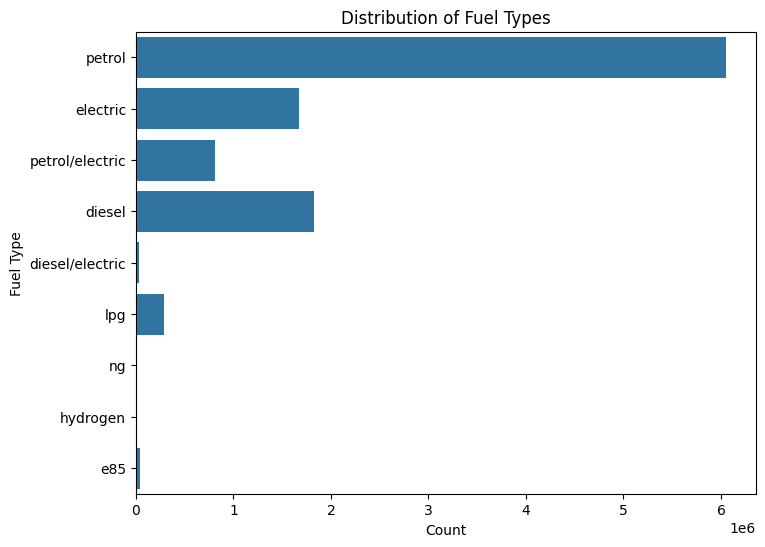

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(y="fuel_type", data=df)

plt.xlabel("Count")
plt.ylabel("Fuel Type")
plt.title("Distribution of Fuel Types")

Text(0.5, 1.0, 'Potential relationship of fuel_type to fuel_consumption')

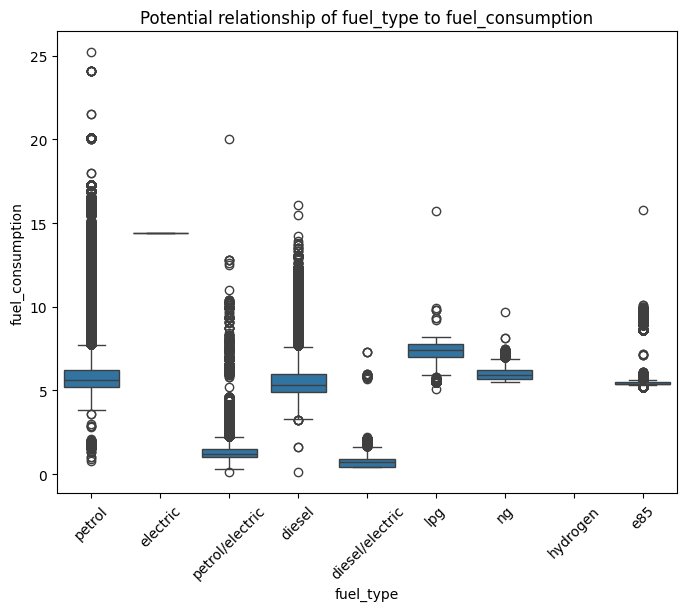

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="fuel_type", y="fuel_consumption", data=df)

plt.xticks(rotation=45)
plt.xlabel("fuel_type")
plt.ylabel("fuel_consumption")
plt.title("Potential relationship of fuel_type to fuel_consumption")

Text(0.5, 1.0, 'Potential relationship of fuel_type to specific_co2_emissions')

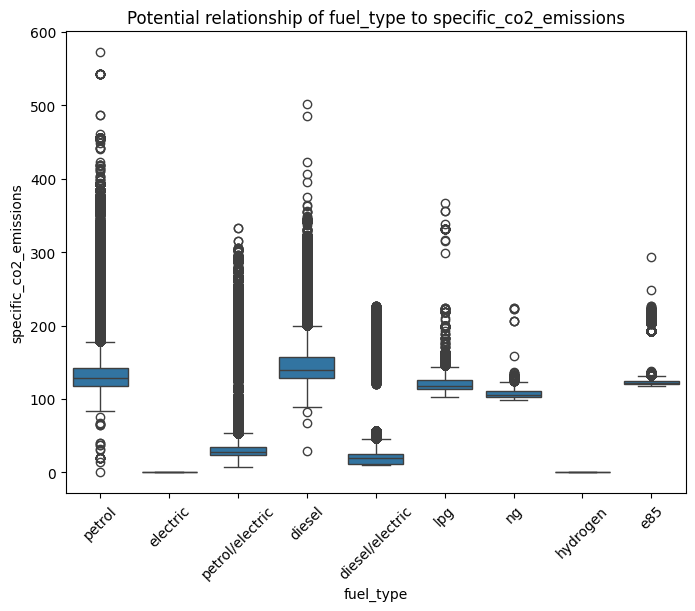

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="fuel_type", y="specific_co2_emissions", data=df)


plt.xticks(rotation=45)
plt.xlabel("fuel_type")
plt.ylabel("specific_co2_emissions")
plt.title("Potential relationship of fuel_type to specific_co2_emissions")

---> specific_co2_emissions for fuel_type electric and hydrogen are always 0
* check fuel_type electric against electric_energy_consumption

Text(0.5, 1.0, 'Potential relationship of electric fuel_type to electric_energy_consumption')

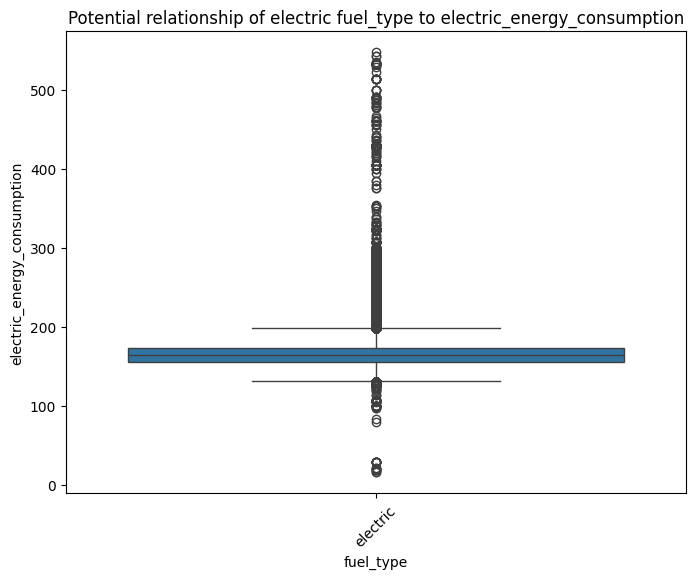

In [ ]:
# take a deeper look into df_electric
df_electric = df[df["fuel_type"] == "electric"]


plt.figure(figsize=(8, 6))
sns.boxplot(x="fuel_type", y="electric_energy_consumption", data=df_electric)

plt.xticks(rotation=45)
plt.xlabel("fuel_type")
plt.ylabel("electric_energy_consumption")
plt.title("Potential relationship of electric fuel_type to electric_energy_consumption")

In [ ]:
# check how many cars have fuel_type hydroen
hydrogen_count = len(df[df["fuel_type"] == "hydrogen"])
print(f"{hydrogen_count} cars with fuel_type hydrogen")

730 cars with fuel_type hydrogen


Remove hydrogen cars from our df as they are not representative

In [ ]:
# drop rows with df["fuel_type"] == "hydrogen"
df = df[df["fuel_type"] != "hydrogen"]

## Split dataset into dataframe fuel type electric and dataframe with fuel types belonging to combustion engine category

### Cars with fuel_type electric

In [29]:
# check missing percentages of df_electric
print("Missing percentage for fuel_type == electric:")
print(df_electric.isna().sum() / len(df_electric))

Missing percentage for fuel_type == electric:
category_of_vehicle            0.000000
fuel_type                      0.000000
mass_vehicle                   0.000037
engine_capacity                1.000000
engine_power                   0.026407
year                           0.000000
electric_energy_consumption    0.028529
fuel_consumption               0.999995
specific_co2_emissions         0.000005
dtype: float64


Remove variables that are useful for df_electric

In [30]:
# "fuel_type" not needed anymore as we only have fuel_type electric for now
columns_to_analyse = ["category_of_vehicle", "mass_vehicle", "engine_power", "year", "electric_energy_consumption"]
df_electric = df_electric[columns_to_analyse]

#### Encoding

In [31]:
# encoding of categorical vars
cat_columns = pd.DataFrame.select_dtypes(df_electric, include=["object"]).columns
quant_columns = df_electric.select_dtypes(exclude=["object"]).columns

ct_electric = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), cat_columns)], remainder="passthrough")
transformed_array = ct_electric.fit_transform(df_electric)
encoder_feature_names = ct_electric.named_transformers_["encoder"].get_feature_names_out(cat_columns)

preserved_col_names = list(encoder_feature_names)
preserved_col_names.extend(list(quant_columns))

df_electric = pd.DataFrame(transformed_array, columns=preserved_col_names)

#### Calculate and analyse correlations

<Axes: >

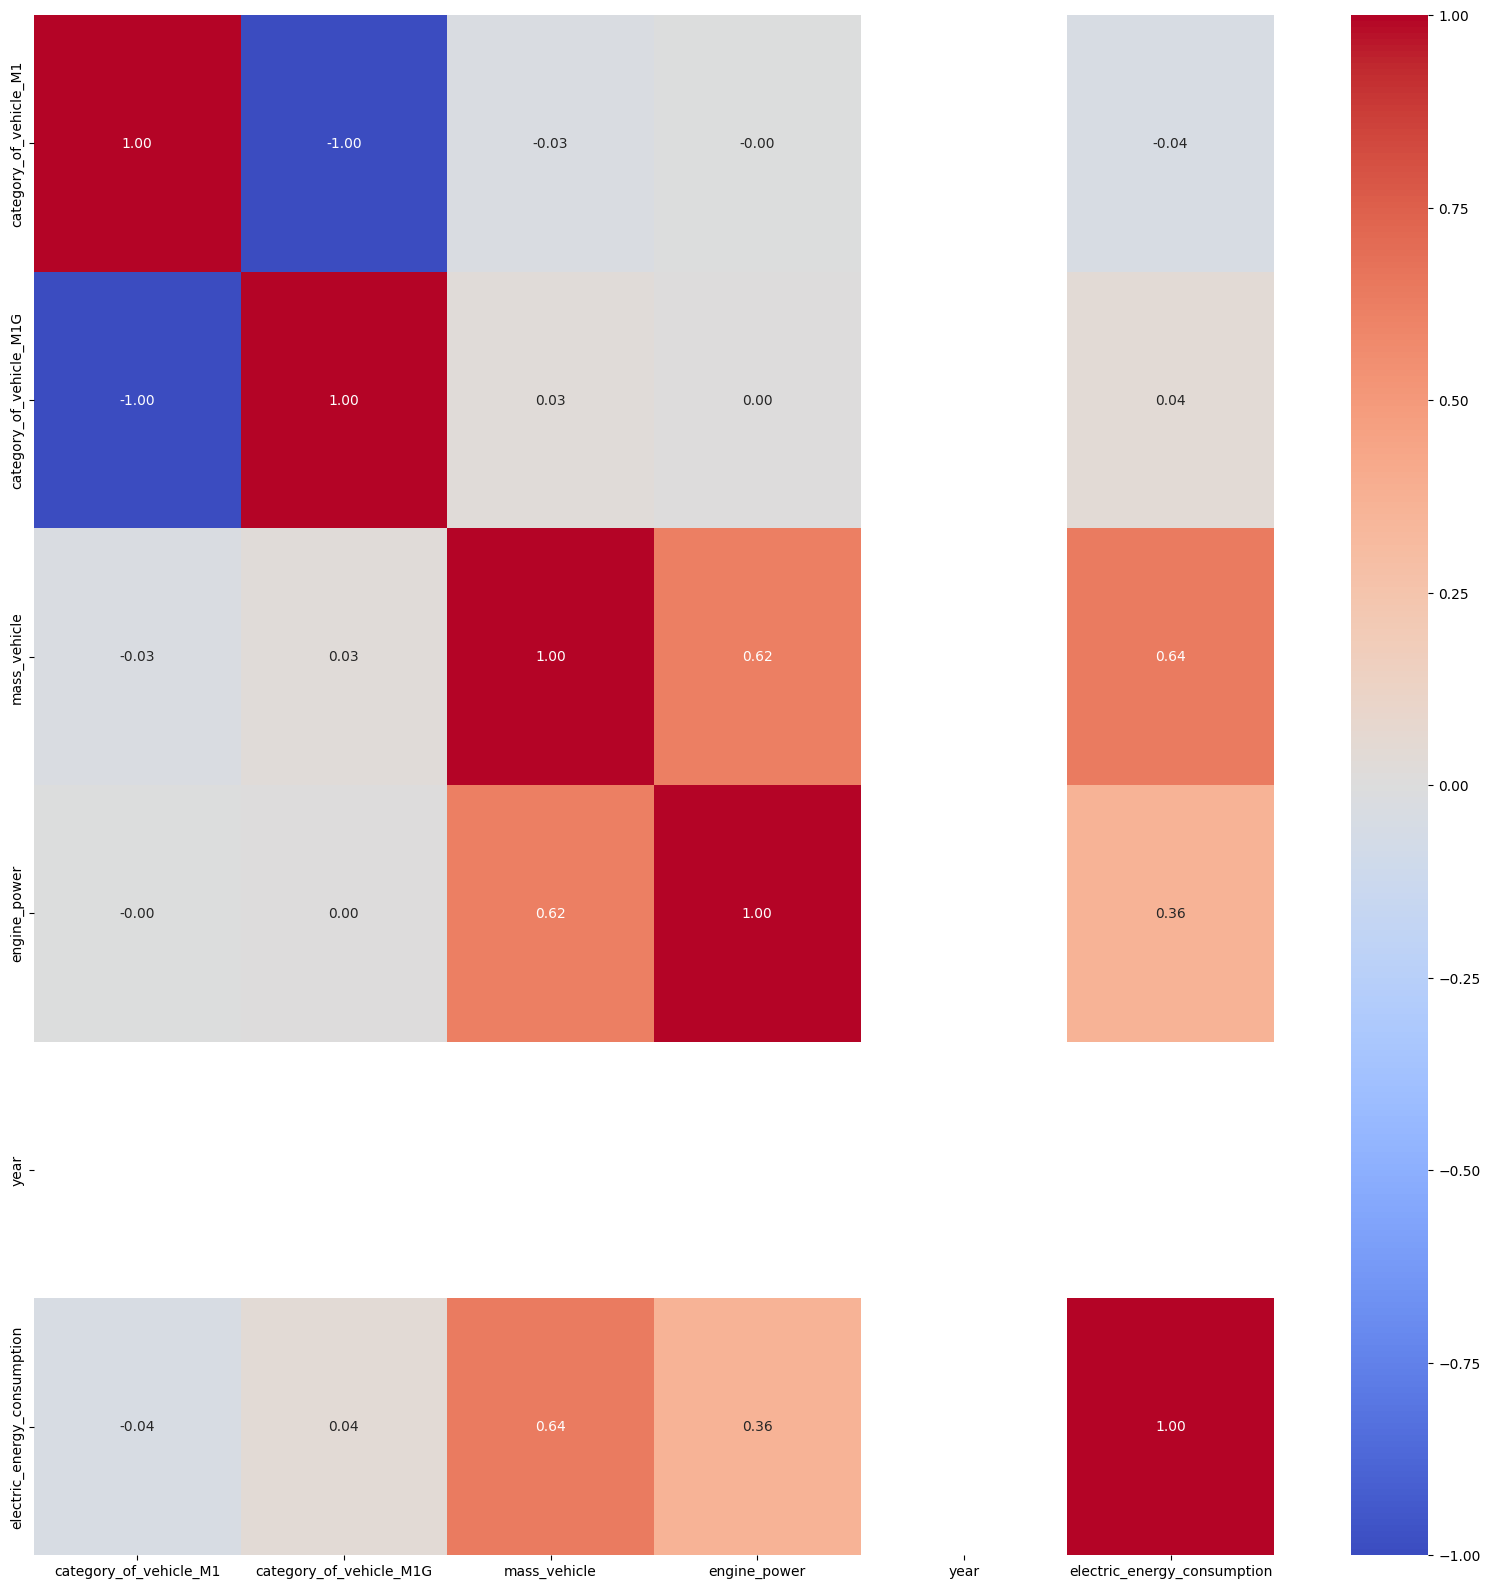

In [32]:
corr_matrix_electric = df_electric.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix_electric, annot=True, cmap="coolwarm", fmt=".2f")

In [33]:
# check against target electric_energy_consumption
corr_table = df_electric.corr()["electric_energy_consumption"].sort_values(ascending=False)
print(corr_table)
corr_table.to_csv("files/output/corr_table_electric_energy_consumption.csv")

electric_energy_consumption    1.000000
mass_vehicle                   0.637126
engine_power                   0.363259
category_of_vehicle_M1G        0.044421
category_of_vehicle_M1        -0.044421
year                                NaN
Name: electric_energy_consumption, dtype: float64


### Cars with fuel_type belonging to combustion category

> All cars that are not electric
>
> consider hybrid petrol/electric and diesel/electric to belong to combustion category

In [34]:
# MAKE SURE to update fuel_types if other datasets have types we did not consider.
combustion_fuel_types = ["petrol", "diesel", "petrol/electric", "lpg", "e85", "diesel/electric", "ng"]
df_combustion = df[df["fuel_type"].isin(combustion_fuel_types)]

In [35]:
# check missing percentages of df_combustion
print("Missing percentage for fuel_type belonging to combustion:")
print(df_combustion.isna().sum() / len(df_combustion))

Missing percentage for fuel_type belonging to combustion:
category_of_vehicle            0.000000
fuel_type                      0.000000
mass_vehicle                   0.000013
engine_capacity                0.000009
engine_power                   0.000729
year                           0.000000
electric_energy_consumption    0.910100
fuel_consumption               0.024163
specific_co2_emissions         0.001474
dtype: float64


Remove variables that are useful for df_combustion

In [36]:
columns_to_analyse = ["category_of_vehicle", "fuel_type", "mass_vehicle", "engine_capacity", "engine_power", "year", "fuel_consumption"]
df_combustion = df_combustion[columns_to_analyse]

#### Encoding

In [37]:
# encoding of categorical vars
cat_columns = pd.DataFrame.select_dtypes(df_combustion, include=["object"]).columns
quant_columns = df_combustion.select_dtypes(exclude=["object"]).columns

ct_combustion = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), cat_columns)], remainder="passthrough")
transformed_array = ct_combustion.fit_transform(df_combustion)
encoder_feature_names = ct_combustion.named_transformers_["encoder"].get_feature_names_out(cat_columns)

preserved_col_names = list(encoder_feature_names)
preserved_col_names.extend(list(quant_columns))

df_combustion = pd.DataFrame(transformed_array, columns=preserved_col_names)

#### Calculate and analyse correlations

<Axes: >

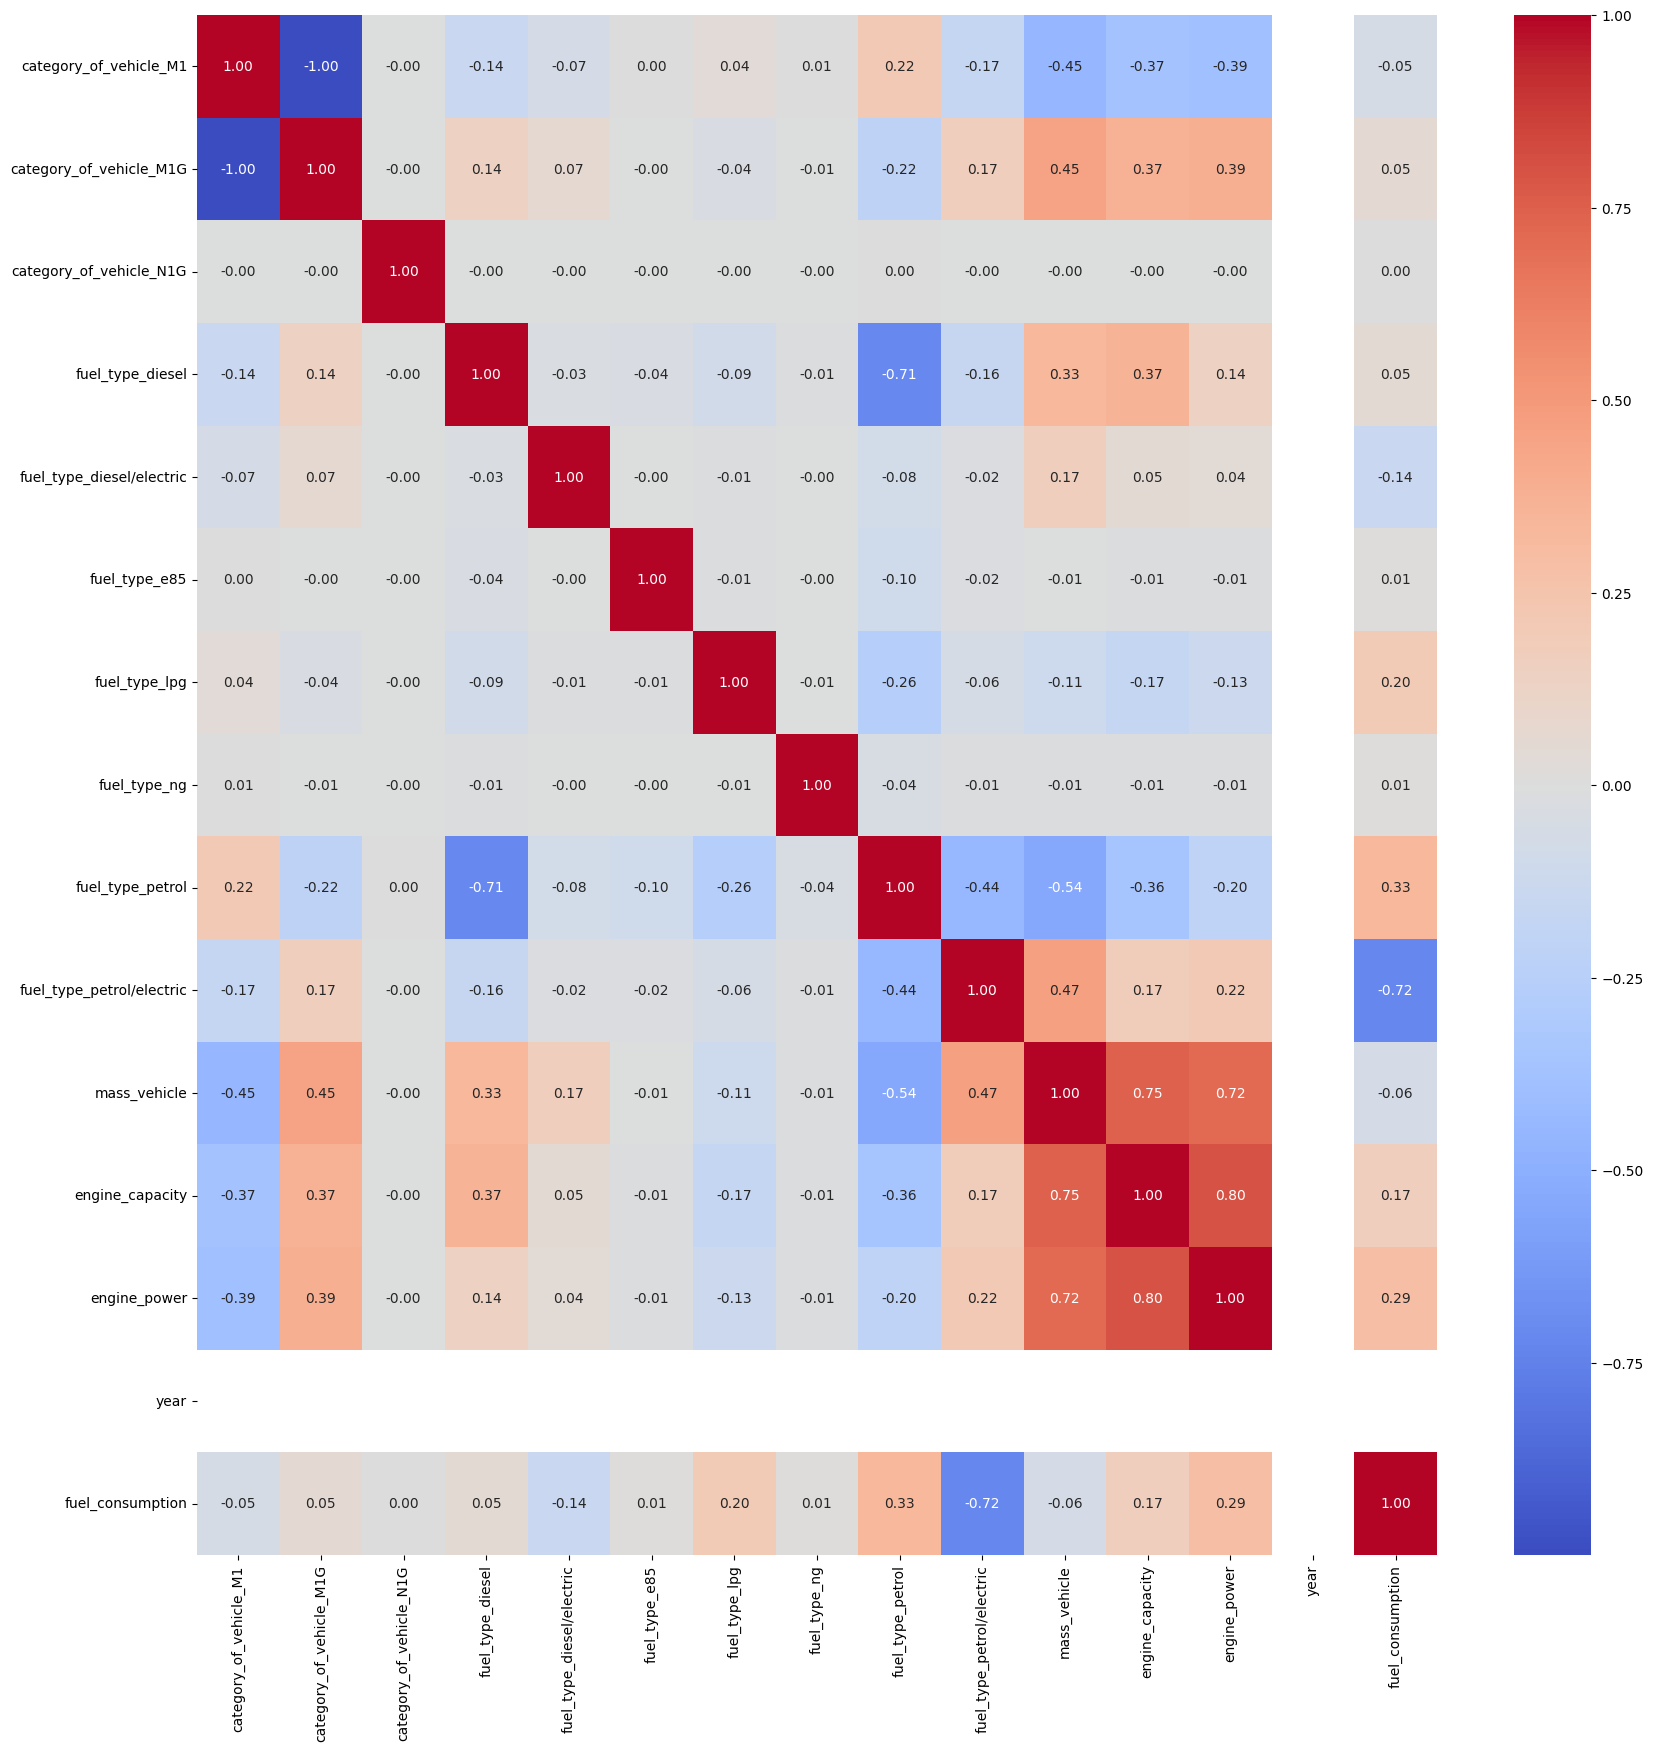

In [38]:
corr_matrix_combustion = df_combustion.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix_combustion, annot=True, cmap="coolwarm", fmt=".2f")

In [39]:
# check against target fuel_consumption
corr_table = df_combustion.corr()["fuel_consumption"].sort_values(ascending=False)
print(corr_table)
corr_table.to_csv("files/output/corr_table_fuel_consumption.csv")

fuel_consumption             1.000000
fuel_type_petrol             0.332563
engine_power                 0.289331
fuel_type_lpg                0.196725
engine_capacity              0.167810
category_of_vehicle_M1G      0.054936
fuel_type_diesel             0.049822
fuel_type_e85                0.011613
fuel_type_ng                 0.008595
category_of_vehicle_N1G      0.000743
category_of_vehicle_M1      -0.054938
mass_vehicle                -0.064284
fuel_type_diesel/electric   -0.142624
fuel_type_petrol/electric   -0.723062
year                              NaN
Name: fuel_consumption, dtype: float64
